In [1]:
import importlib
import xarray as xr
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import jlat_utils as jlat
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import filter_utils as filt
from ecpaper_utils import averaging_utils as avg
from ecpaper_utils import linfit_utils as linfit

importlib.reload(jlat)
importlib.reload(boot)
importlib.reload(filt)
importlib.reload(linfit)

import warnings
warnings.filterwarnings('ignore')

In [3]:
datadir = "/project/cas/islas/python_savs/ecpaper2020/DATASORT/VWIND/"
cmip5models = ['ACCESS1-3', 'bcc-csm1-1-m','CanESM2','CESM1-CAM5','CESM1-WACCM','CMCC-CMS','CNRM-CM5','EC-EARTH','FGOALS-g2','FIO-ESM','GFDL-CM3','GFDL-ESM2M','GISS-E2-R',
              'HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC5','MIROC-ESM','MPI-ESM-LR','MPI-ESM-MR','MRI-CGCM3','NorESM1-ME']
cmip6models = ['ACCESS-CM2', 'BCC-CSM2-MR','CanESM5','CESM2','CESM2-WACCM','CMCC-CM2-SR5','CNRM-CM6-1','EC-Earth3','FGOALS-g3','FIO-ESM-2-0','GFDL-CM4','GFDL-ESM4','GISS-E2-1-G',
              'HadGEM3-GC31-LL','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MIROC-ES2L','MPI-ESM1-2-LR','MPI-ESM1-2-HR','MRI-ESM2-0','NorESM2-LM']
              
cmip5dat = xr.open_dataset(datadir+'cmip5vwindindices.nc')
cmip6dat = xr.open_dataset(datadir+'cmip6vwindindices.nc')

vpastampcmip5 = np.zeros([len(cmip5models)]) ; vpastampcmip6 = np.zeros([len(cmip6models)])
vdifcmip5 = np.zeros([len(cmip5models)]) ; vdifcmip6 = np.zeros([len(cmip6models)])
for imod in range(0,len(cmip5models),1):
    vpastampcmip5[imod] = cmip5dat.vpastamp_em.sel(Model=cmip5models[imod])
    vdifcmip5[imod] = cmip5dat.vfutsw_em.sel(Model=cmip5models[imod]) - cmip5dat.vpastsw_em.sel(Model=cmip5models[imod])
    
for imod in range(0,len(cmip6models),1):
    vpastampcmip6[imod] = cmip6dat.vpastamp_em.sel(Model=cmip6models[imod])
    vdifcmip6[imod] = cmip6dat.vfutsw_em.sel(Model=cmip6models[imod]) - cmip6dat.vpastsw_em.sel(Model=cmip6models[imod])

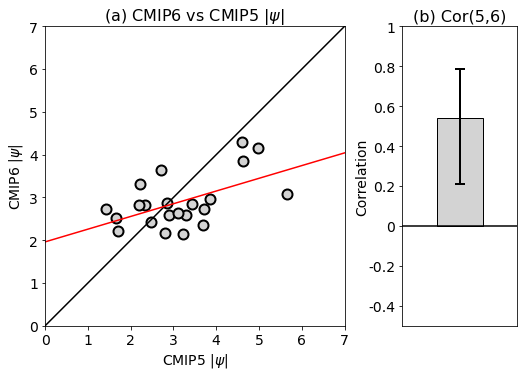

In [5]:
fig = plt.figure(figsize=(16,16))

ax1 = fig.add_axes(np.array([0.05,0.83,0.26,0.26]))

ax1.set_xlim(0,7)
ax1.set_ylim(0,7)
ax1.set_xticks([0,1,2,3,4,5,6,7])
ax1.set_xticklabels(['0','1','2','3','4','5','6','7'], fontsize=14)
ax1.set_xlabel('CMIP5 $|\psi|$', fontsize=14)
ax1.set_ylabel('CMIP6 $|\psi|$', fontsize=14)
ax1.set_title('(a) CMIP6 vs CMIP5 |$\psi$|', fontsize=16)
ax1.set_yticks([0,1,2,3,4,5,6,7])
ax1.set_yticklabels(['0','1','2','3','4','5','6','7'], fontsize=14)
ax1.plot(vpastampcmip5, vpastampcmip6,"o",markersize=10, markerfacecolor='lightgray',markeredgecolor='black',markeredgewidth=2)
ax1.plot([0,7],[0,7], color='black')
a, b = linfit.linfit_xy(vpastampcmip5, vpastampcmip6)
xvals = np.arange(0,8,1)
ax1.plot(xvals, a + b*xvals, color='red')

ax2 = fig.add_axes(np.array([0.36,0.83,0.1,0.26]))
corval = np.corrcoef(vpastampcmip5,vpastampcmip6)
corval = corval[0,1]
mincor, maxcor = boot.boot_corr_ci(vpastampcmip5,vpastampcmip6,95)

ax2.bar(1,corval,color='lightgray',edgecolor='black')
ax2.plot([0,2],[0,0], color='black')
ax2.errorbar(1, corval, [[corval-mincor],[maxcor-corval]], color='black', linewidth=2, capsize=5, capthick=2)
ax2.set_xlim(0,2)
ax2.set_ylim(-0.5,1)
ax2.set_xticks([])
ax2.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax2.set_yticklabels(['-0.4','-0.2','0','0.2','0.4','0.6','0.8','1'], fontsize=14)
#ax2.label_params(axis='y',pad=0)
ax2.set_ylabel("Correlation", fontsize=14, labelpad=-1)
ax2.set_title('(b) Cor(5,6)', fontsize=16)

fig.savefig("figs5.pdf", bbox_inches="tight", facecolor="white")